In [ ]:
#Holt-Winters Model - 1st Part 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
airline = pd.read_csv('D:\\Data for Preprocessing\\Forecasting Data\\airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
airline.index.freq = 'MS'

In [7]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
span = 12
alpha = 2/(span+1)

In [12]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [13]:
airline

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861
...,...,...
1960-08-01,606,494.898619
1960-09-01,508,496.914216
1960-10-01,461,491.388952


In [15]:
model = SimpleExpSmoothing(airline['Thousands of Passengers'])

In [16]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [21]:
airline['SES12'] = fitted_model.fittedvalues.shift(-1)

In [22]:
airline.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [23]:
#Holt-Winters Model - 2nd Part 

In [24]:
airline

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [30]:
airline['Des_add_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend ='add').fit().fittedvalues.shift(-1)

In [31]:
airline.head()

,Thousands of Passengers,EWMA12,SES12,Des_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.221156
1949-02-01,118,112.923077,112.923077,120.175837
1949-03-01,132,115.857988,115.857988,134.115056
1949-04-01,129,117.879836,117.879836,131.244976
1949-05-01,121,118.359861,118.359861,123.283465


In [32]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'Des_add_12'], dtype='object')

<AxesSubplot:xlabel='Month'>

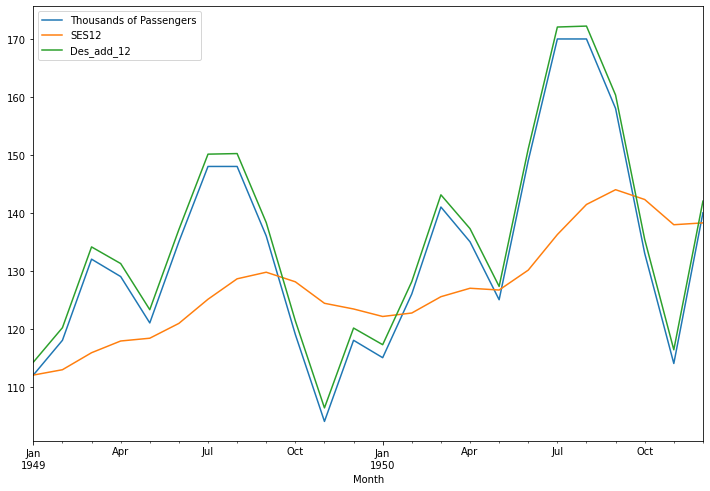

In [37]:
airline[['Thousands of Passengers', 'SES12', 'Des_add_12']].iloc[:24].plot(figsize=(12,8))

<AxesSubplot:xlabel='Month'>

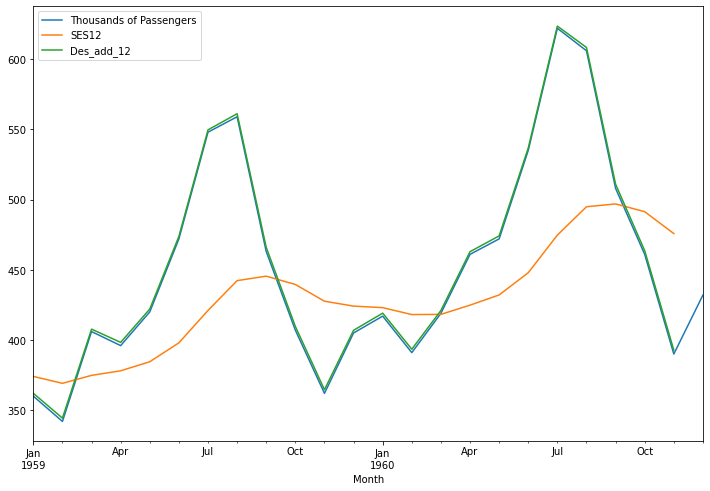

In [39]:
airline[['Thousands of Passengers', 'SES12', 'Des_add_12']].iloc[-24:].plot(figsize=(12,8))

<AxesSubplot:xlabel='Month'>

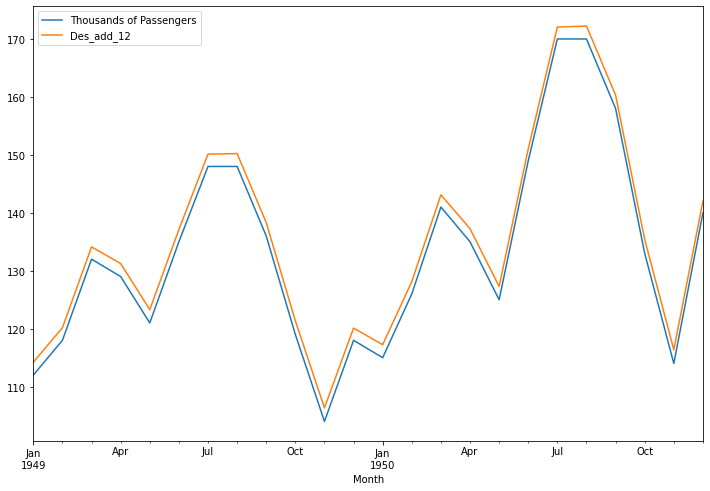

In [38]:
airline[['Thousands of Passengers', 'Des_add_12']].iloc[:24].plot(figsize=(12,8))

<AxesSubplot:xlabel='Month'>

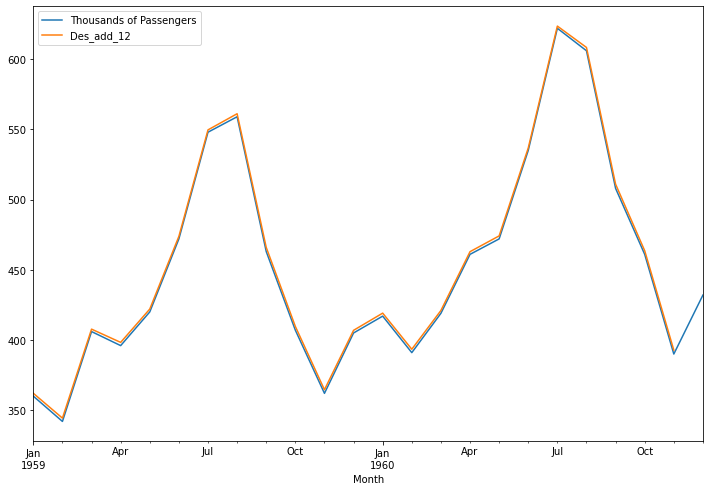

In [40]:
airline[['Thousands of Passengers', 'Des_add_12']].iloc[-24:].plot(figsize=(12,8))

In [42]:
airline['Des_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend ='mul').fit().fittedvalues.shift(-1)

In [43]:
airline

,Thousands of Passengers,EWMA12,SES12,Des_add_12,Des_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.221156,112.688538
1949-02-01,118,112.923077,112.923077,120.175837,118.725424
1949-03-01,132,115.857988,115.857988,134.115056,132.811491
1949-04-01,129,117.879836,117.879836,131.244976,129.793048
1949-05-01,121,118.359861,118.359861,123.283465,121.743867
...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.358441,609.725481
1960-09-01,508,496.914216,496.914216,510.986001,511.123012
1960-10-01,461,491.388952,491.388952,463.593235,463.834071


In [44]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'Des_add_12',
       'Des_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

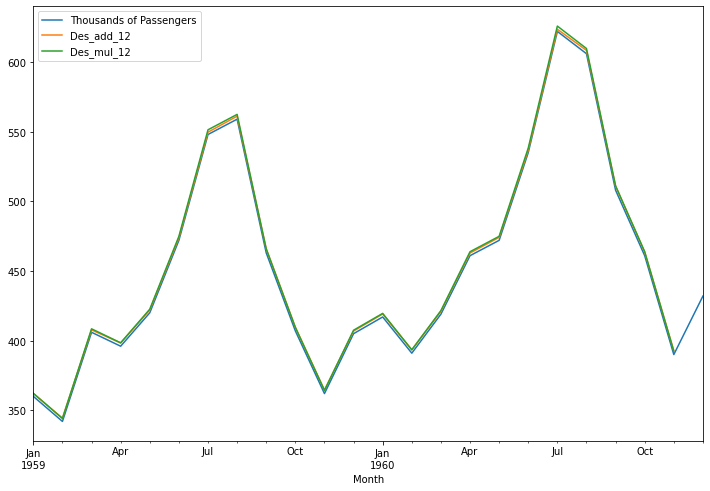

In [46]:
airline[['Thousands of Passengers', 'Des_add_12','Des_mul_12']].iloc[-24:].plot(figsize=(12,8))

<AxesSubplot:xlabel='Month'>

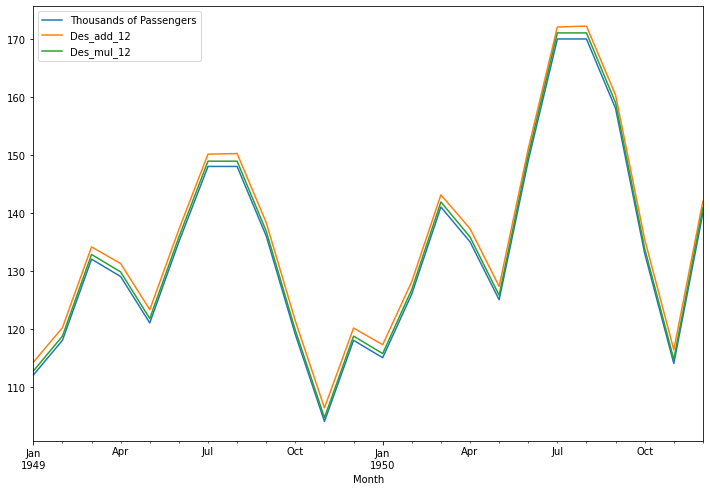

In [47]:
airline[['Thousands of Passengers', 'Des_add_12','Des_mul_12']].iloc[:24].plot(figsize=(12,8))

In [49]:
airline['TES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues

In [52]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'Des_add_12',
       'Des_mul_12', 'TES_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

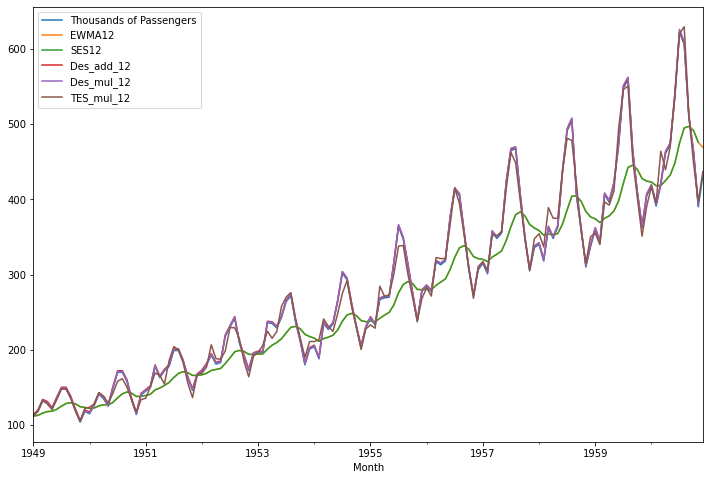

In [51]:
airline.plot(figsize=(12,8))

<AxesSubplot:xlabel='Month'>

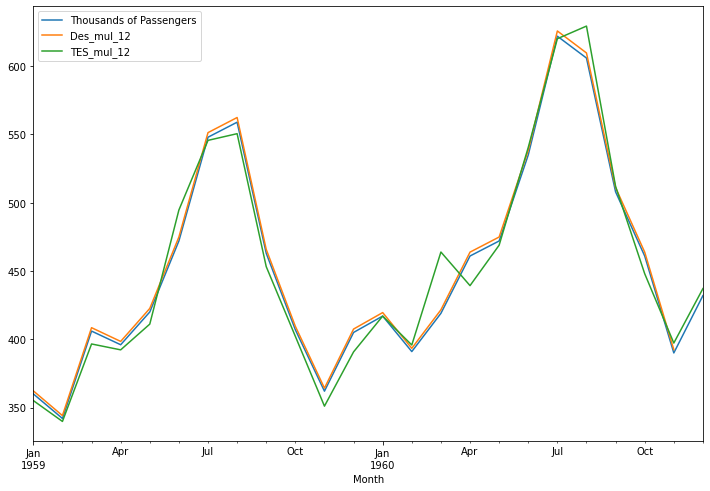

In [53]:
airline[['Thousands of Passengers','Des_mul_12','TES_mul_12' ]].iloc[-24:].plot(figsize=(12,8))

<AxesSubplot:xlabel='Month'>

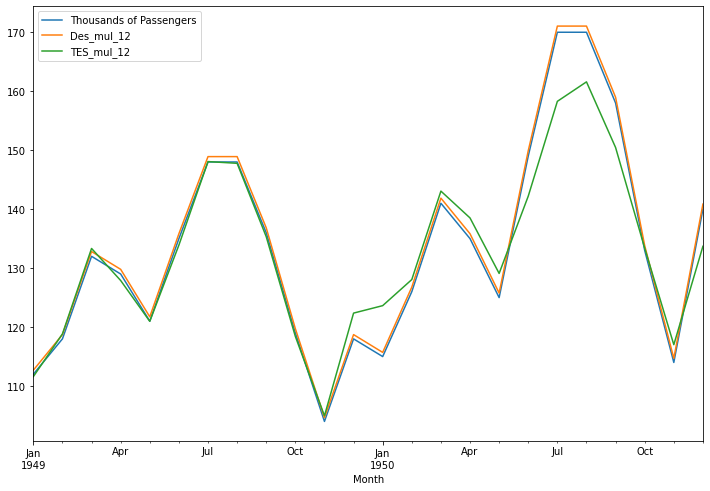

In [54]:
airline[['Thousands of Passengers','Des_mul_12','TES_mul_12' ]].iloc[:24].plot(figsize=(12,8))